In [1146]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import os
os.chdir("D:\\Machinelearning\\csv")

In [1147]:
df=pd.read_csv("pcos.csv")

In [1148]:
df=df.drop(["Sl. No","Patient File No.","PRG","RBS","bpsystolic","BPDiastolic","LH","FSH/LH","betaHCG2","betaHCG1","FSH","Endometrium","FollicleNos","FollicleNo","af","Avgsize","Cycle","ms","VitD3"],axis=1)

In [1149]:
df=df.dropna(subset=['Fastfood'])

In [1150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 540
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PCOS               540 non-null    int64  
 1   Age                540 non-null    int64  
 2   w                  540 non-null    float64
 3   h                  540 non-null    float64
 4   BMI                540 non-null    float64
 5   BloodGroup         540 non-null    int64  
 6   Pulserate          540 non-null    int64  
 7   rr                 540 non-null    int64  
 8   hb                 540 non-null    float64
 9   Cyclelength        540 non-null    int64  
 10  Pregnant           540 non-null    int64  
 11  abortions          540 non-null    int64  
 12  Hip                540 non-null    int64  
 13  Waist              540 non-null    int64  
 14  Waistohip          540 non-null    float64
 15  TSH                540 non-null    float64
 16  AMH                540 non

In [1151]:
x=df[['w','h','Pregnant','abortions','Weightgain','Skindarkening','TSH','Hairloss','Fastfood']]

In [1152]:
x.shape

(540, 9)

In [1153]:
y=df['PCOS']
y.shape

(540,)

In [1154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [1155]:
x_train.isnull().sum()

w                0
h                0
Pregnant         0
abortions        0
Weightgain       0
Skindarkening    0
TSH              0
Hairloss         0
Fastfood         0
dtype: int64

In [1156]:
x_train.mean()

w                 59.554167
h                156.835213
Pregnant           0.370370
abortions          0.300926
Weightgain         0.375000
Skindarkening      0.298611
TSH                2.894266
Hairloss           0.453704
Fastfood           0.504630
dtype: float64

In [1157]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [1158]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [1159]:
np.round(x_train.describe(),1)

,w,h,Pregnant,abortions,Weightgain,Skindarkening,TSH,Hairloss,Fastfood
count,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
mean,59.6,156.8,0.4,0.3,0.4,0.3,2.9,0.5,0.5
std,10.9,6.2,0.5,0.7,0.5,0.5,2.8,0.5,0.5
min,31.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,52.0,152.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0
50%,59.0,157.0,0.0,0.0,0.0,0.0,2.2,0.0,1.0
75%,65.0,161.0,1.0,0.0,1.0,1.0,3.5,1.0,1.0
max,108.0,180.0,1.0,5.0,1.0,1.0,25.9,1.0,1.0


In [1160]:
np.round(x_train_scaled.describe(),1)

,w,h,Pregnant,abortions,Weightgain,Skindarkening,TSH,Hairloss,Fastfood
count,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
mean,0.6,0.9,0.4,0.1,0.4,0.3,0.1,0.5,0.5
std,0.1,0.0,0.5,0.1,0.5,0.5,0.1,0.5,0.5
min,0.3,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.5,0.8,0.0,0.0,0.0,0.0,0.1,0.0,0.0
50%,0.5,0.9,0.0,0.0,0.0,0.0,0.1,0.0,1.0
75%,0.6,0.9,1.0,0.0,1.0,1.0,0.1,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [1161]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_train_scaled=sc.fit(x_train)
#x_train_scaled=sc.transform(x_train)
#x_test=sc.transform(x_test)

In [1162]:
#sc.mean_

In [1163]:
#x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [1164]:
#x_train_scaled.describe()

In [1165]:
#np.round(x_train_scaled.describe(),1)

In [1166]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)


In [1167]:
classifier.fit(x_train_scaled, y_train)

LogisticRegression(random_state=0)

In [1168]:
y_pred=classifier.predict(x_test_scaled)

In [1169]:
from sklearn.metrics import accuracy_score


In [1170]:
print(accuracy_score(y_test,y_pred))

0.7037037037037037


<AxesSubplot:>

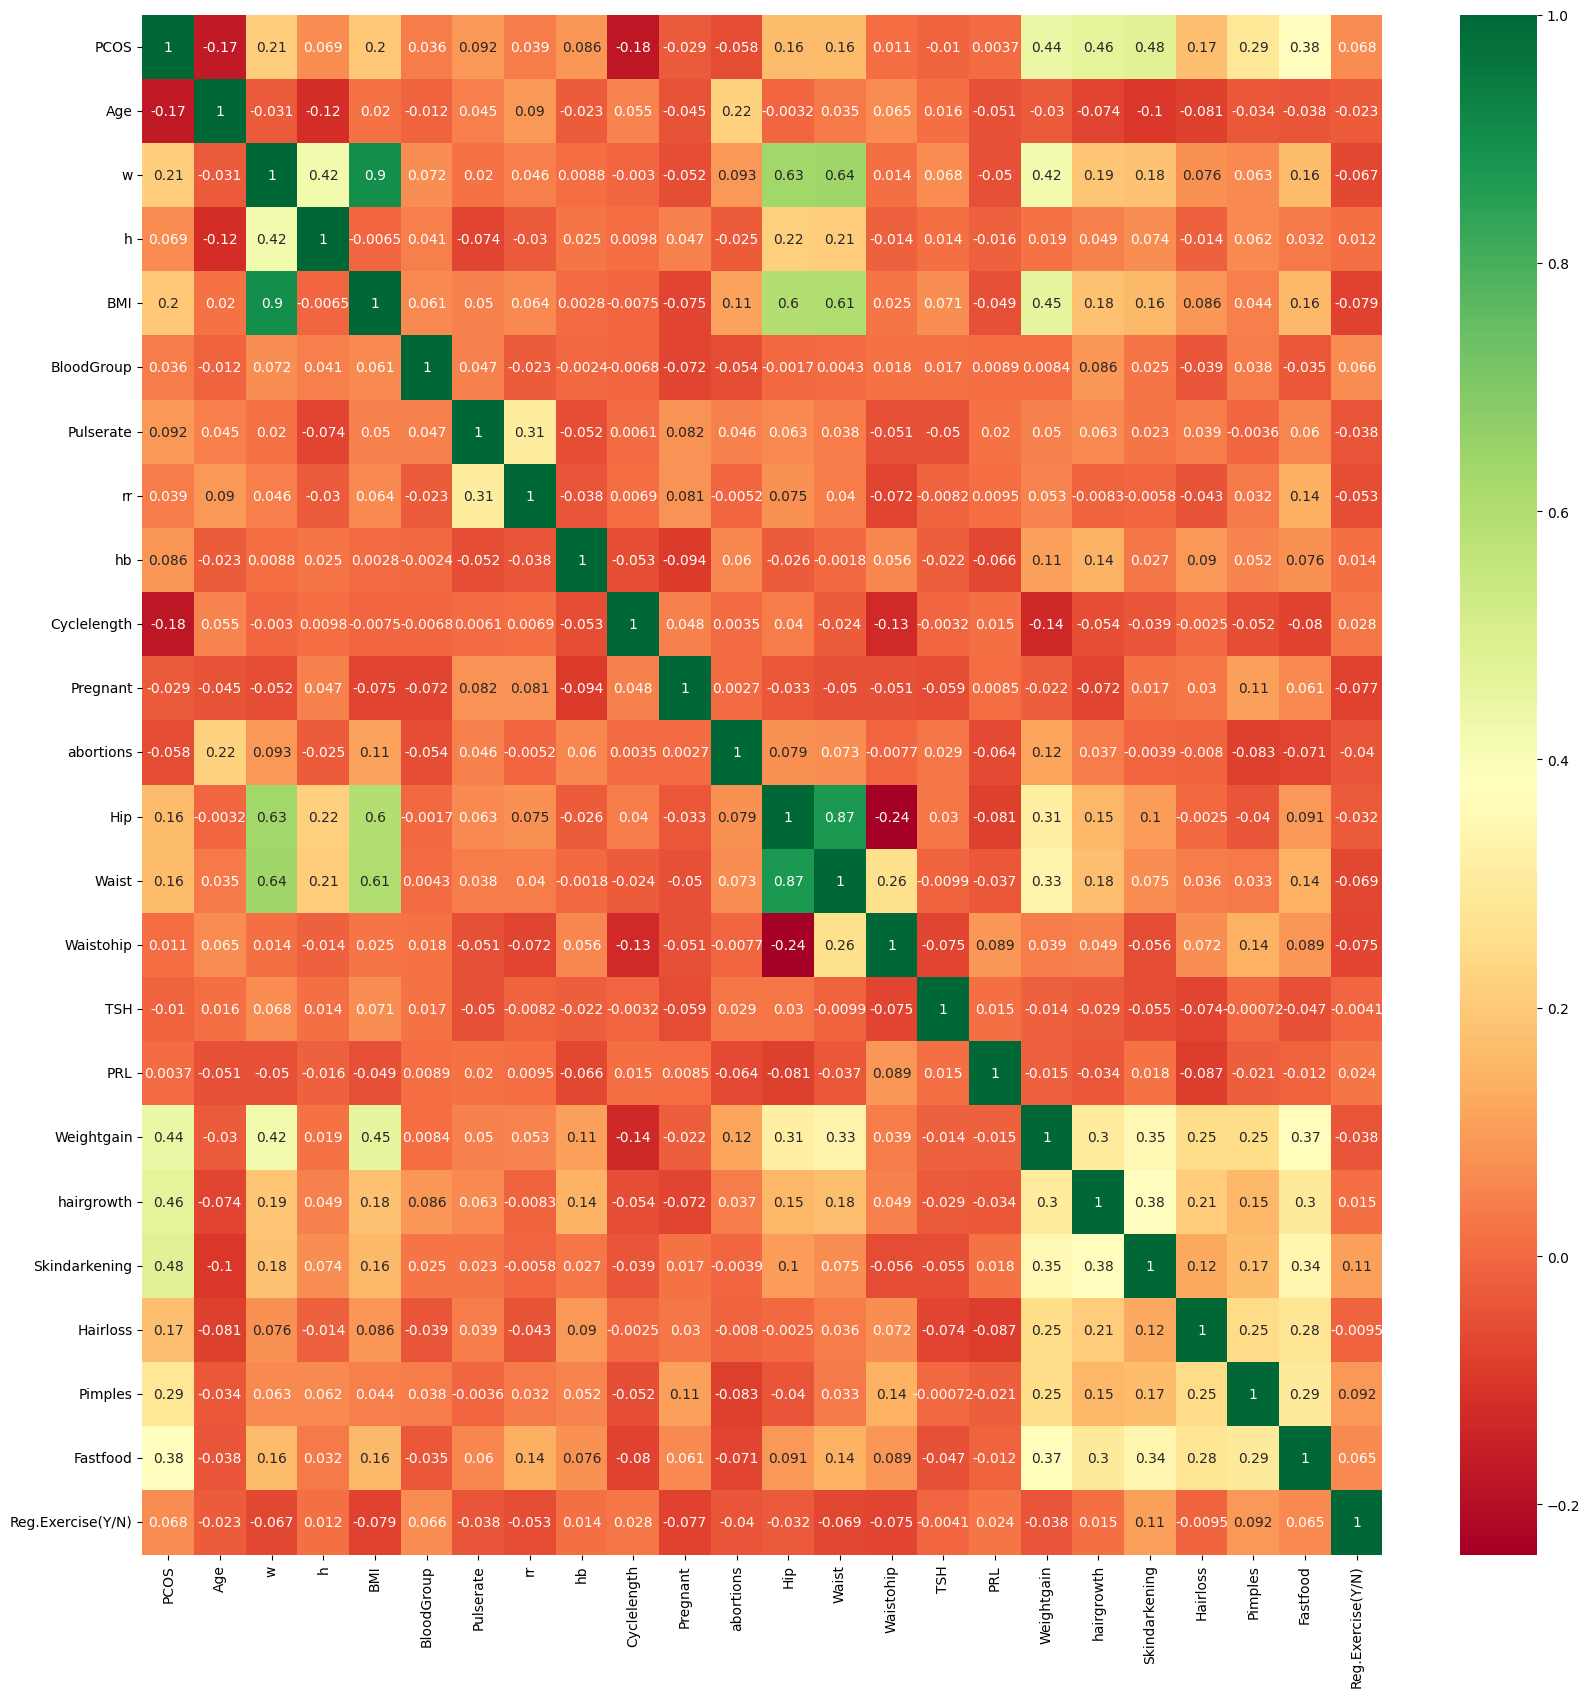

In [1171]:
corrmap=df.corr()
top_corr=corrmap.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')
g

C:\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


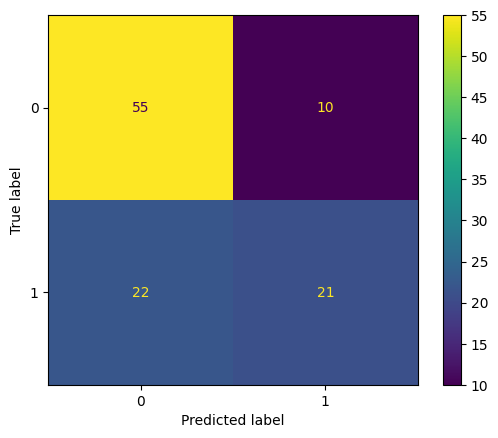

In [1172]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test_scaled,y_test)
plt.show()

In [1173]:
new_data=[{'Age':33,
            'w':68.8,
            'h':165,
            'Pregnant':1,
            'abortions':0,
            'Fastfood':0,
            'Weightgain':0,
            'TSH':2.54,
            'Skindarkening':0
            }]

In [1174]:
from sklearn.feature_extraction import DictVectorizer
dictvector=DictVectorizer(sparse=False)
features=dictvector.fit_transform(new_data)

In [1175]:
features

array([[ 33.  ,   0.  ,   1.  ,   0.  ,   2.54,   0.  ,   0.  , 165.  ,
         68.8 ]])

In [1176]:
new_datas=scaler.fit_transform(features)


In [1177]:
print(new_datas)

[[1. 0. 1. 0. 1. 0. 0. 1. 1.]]


In [1178]:
predictions=classifier.predict(new_datas)
print(predictions)

[0]


C:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1007]:
import pickle
filename='model.pkl'
pickle.dump(classifier,open(filename,'wb'))